In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

In [6]:
from datetime import timedelta, datetime

import numpy as np
import yfinance as yf

from optfolio.optimize import Optimizer

In [7]:
PERIOD = '10y'

# TICKERS = [
#     AAPL
#     ADBE
#     AMD
#     AMZN
#     CRM
#     DIS
#     FB
#     GOOG
#     INTC
#     MA
#     MSFT
#     NFLX
#     NKE
#     NVDA
#     PYPL
#     SHOP
#     SPOT
#     TSLA
#     TXN
#     V
# ]

TICKERS = [
    # Internet services
    'msft',
    'goog',
    'fb',
#     'twtr',
#     'vmw',
#     'orcl',
#     'bidu',
    'spot',
    # Application software
    'shop',
    'adbe',
    'crm',
#     'wday',
#     'sap',
#     'sq',
#     'team',
    # Comm. equipment
#     'csco',
    # Semiconductors
    'intc',
    'amd',
    'txn',
#     'qcom',
    'nvda',
    # Misc
#     'dell',
    # Personal finance
    'v',
    'ma',
    'pypl',
    # Consumer directionary
    'aapl',
    'nke',
#     'sne',
    'amzn',
#     'ebay',
#     'baba',
    # Aerospace
#     'lmt',
#     'noc',
#     'ba',
    # Media
    'nflx',
    'dis',
    # Airlines
#     'dal',
#     'ual',
#     'luv',
    # Automotive
    'tsla'
]

data = yf.download(
    tickers=TICKERS,
    period=PERIOD,
    interval='1d',
    auto_adjust=True,
    prepost=False,
    groupby='ticker'
).dropna(axis=1, how='all')

daily_returns = (data['Close'] / data['Close'].shift(1) - 1)[1:]
daily_returns.head()

[*********************100%***********************]  20 of 20 completed


,AAPL,ADBE,AMD,AMZN,CRM,DIS,FB,GOOG,INTC,MA,MSFT,NFLX,NKE,NVDA,PYPL,SHOP,SPOT,TSLA,TXN,V
Date,,,,,,,,,,,,,,,,,,,,
2010-03-15,-0.012180,0.009386,-0.001120,-0.005234,-0.001453,0.000890,NaN,-0.028229,-0.004701,0.000440,0.000683,-0.005430,0.007010,-0.005218,NaN,NaN,NaN,NaN,-0.002500,-0.009008
2010-03-16,0.002725,-0.013243,0.053812,0.005033,0.014418,0.000890,NaN,0.003587,0.039679,-0.002959,0.002732,0.014799,-0.000142,0.034965,NaN,NaN,NaN,NaN,0.030911,-0.008224
2010-03-17,-0.001470,0.013421,0.028723,-0.003415,0.000652,0.000000,NaN,0.000637,0.010450,-0.002767,0.008852,0.004106,0.007104,0.019144,NaN,NaN,NaN,NaN,0.009319,-0.001527
2010-03-18,0.002365,0.007326,-0.028956,0.010812,0.002215,0.000889,NaN,0.001485,-0.001798,-0.009451,-0.000674,-0.005358,0.053330,-0.035359,NaN,NaN,NaN,NaN,-0.007627,-0.015080
2010-03-19,-0.010683,-0.030210,-0.029819,-0.018153,-0.011572,-0.004144,NaN,-0.011299,-0.009460,-0.007876,-0.000676,-0.001276,-0.015269,-0.012027,NaN,NaN,NaN,NaN,-0.014563,-0.014313


In [9]:
spy_data = yf.download(tickers='SPY', period=PERIOD, interval='1d', auto_adjust=True, prepost=False)
spy_daily_returns = (spy_data['Close'] / spy_data['Close'].shift(1) - 1)[1:]
spy_daily_returns.head()

[*********************100%***********************]  1 of 1 completed


Date
2010-03-15    0.000260
2010-03-16    0.007966
2010-03-17    0.005927
2010-03-18   -0.000512
2010-03-19   -0.005062
Name: Close, dtype: float64

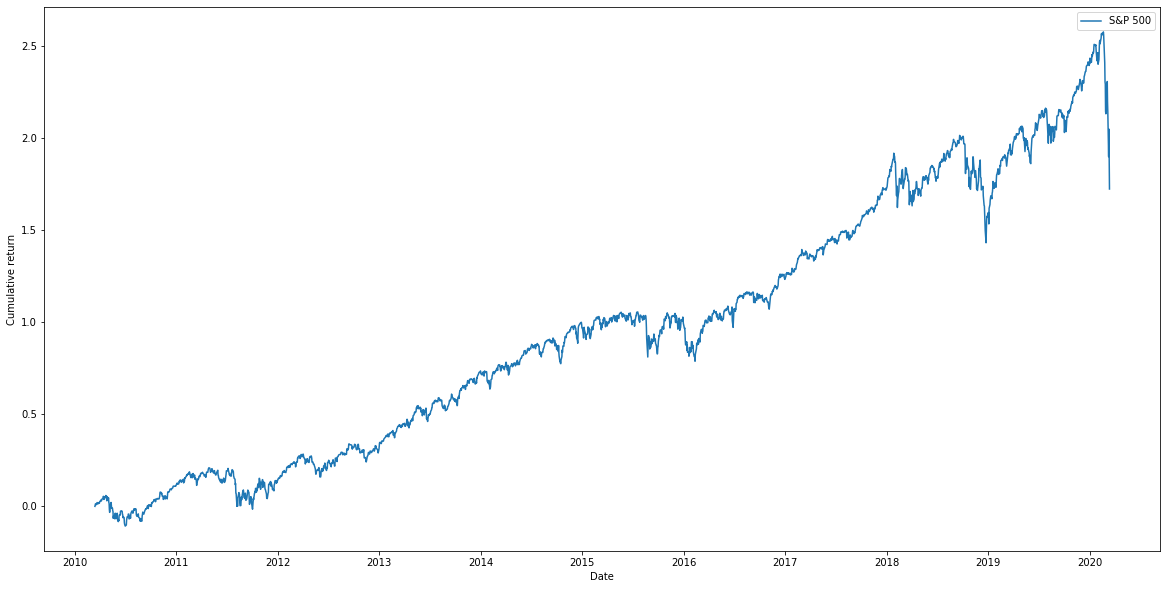

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(np.cumprod(spy_daily_returns + 1) - 1, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()
plt.show()

In [11]:
YEAR_BARS = 252
TEST_YEARS = 0
TRAIN_END_DATE = data.index.max() - timedelta(days=TEST_YEARS * 365)
train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)

spy_train = spy_daily_returns[(spy_daily_returns.index < TRAIN_END_DATE)].fillna(0)
spy_test = spy_daily_returns[(spy_daily_returns.index >= TRAIN_END_DATE)].fillna(0)

print(np.any(np.isnan(train)))
print(train.shape)
train.tail()

False
(2517, 20)


,AAPL,ADBE,AMD,AMZN,CRM,DIS,FB,GOOG,INTC,MA,MSFT,NFLX,NKE,NVDA,PYPL,SHOP,SPOT,TSLA,TXN,V
Date,,,,,,,,,,,,,,,,,,,,
2020-03-05,-0.032437,-0.035234,-0.039912,-0.026217,-0.034663,-0.043631,-0.034366,-0.048669,-0.029312,-0.038464,-0.025095,-0.028688,-0.034225,-0.039436,-0.027060,-0.027351,0.026551,-0.033302,-0.036371,-0.037727
2020-03-06,-0.013280,-0.040623,0.009977,-0.011923,-0.032547,0.011318,-0.022034,-0.015640,-0.020892,-0.012795,-0.028267,-0.010220,-0.024509,-0.026529,-0.011499,-0.052487,-0.019854,-0.029067,-0.013598,-0.013907
2020-03-09,-0.079092,-0.091992,-0.109488,-0.052854,-0.078437,-0.094734,-0.064001,-0.063809,-0.088220,-0.087105,-0.067773,-0.060926,-0.048099,-0.077432,-0.083506,-0.113860,-0.036930,-0.135725,-0.071757,-0.071762
2020-03-10,0.072022,0.086955,0.048764,0.050655,0.066993,0.068136,0.051268,0.053333,0.061554,0.070837,0.068384,0.050911,0.049816,0.063722,0.079799,0.076544,0.015167,0.061398,0.067403,0.067025
2020-03-11,-0.034731,-0.051598,0.007052,-0.037509,-0.041961,-0.053382,-0.044615,-0.050750,-0.042979,-0.038529,-0.045302,-0.039025,-0.048698,-0.055960,-0.053217,-0.062242,-0.048203,-0.017201,-0.050125,-0.052848


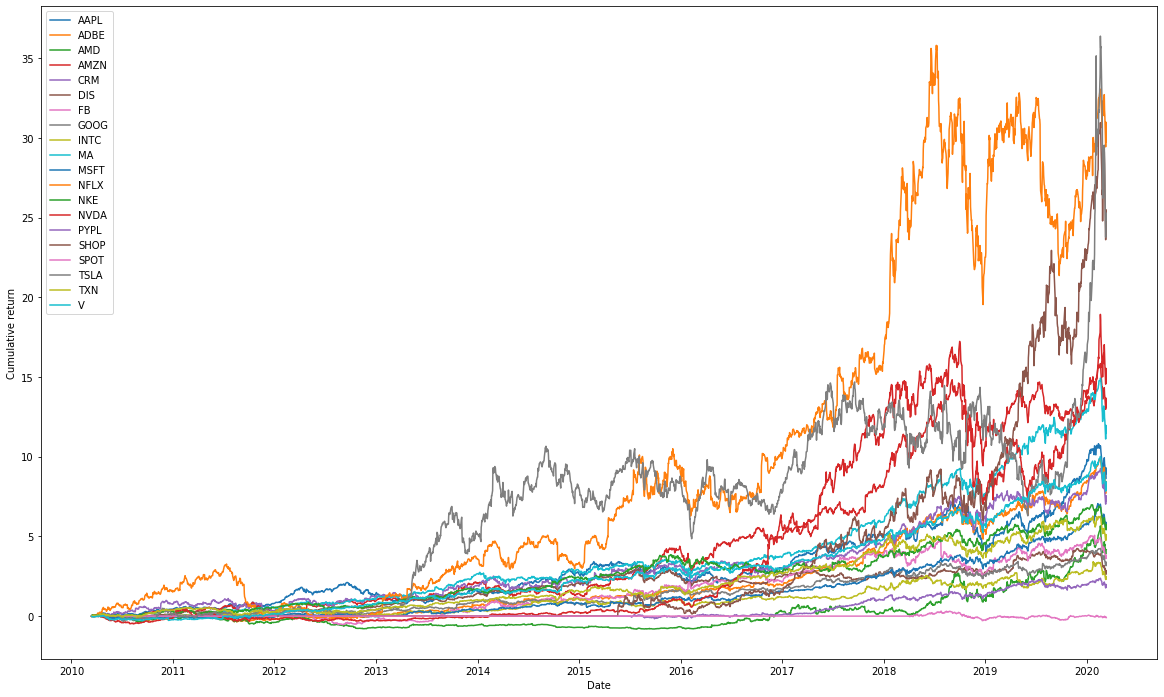

In [12]:
plt.figure(figsize=(20,12))
for col in train.columns:
    plt.plot(np.cumprod(train[col] + 1) - 1, label=col)

plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend(loc='upper left')
plt.show()

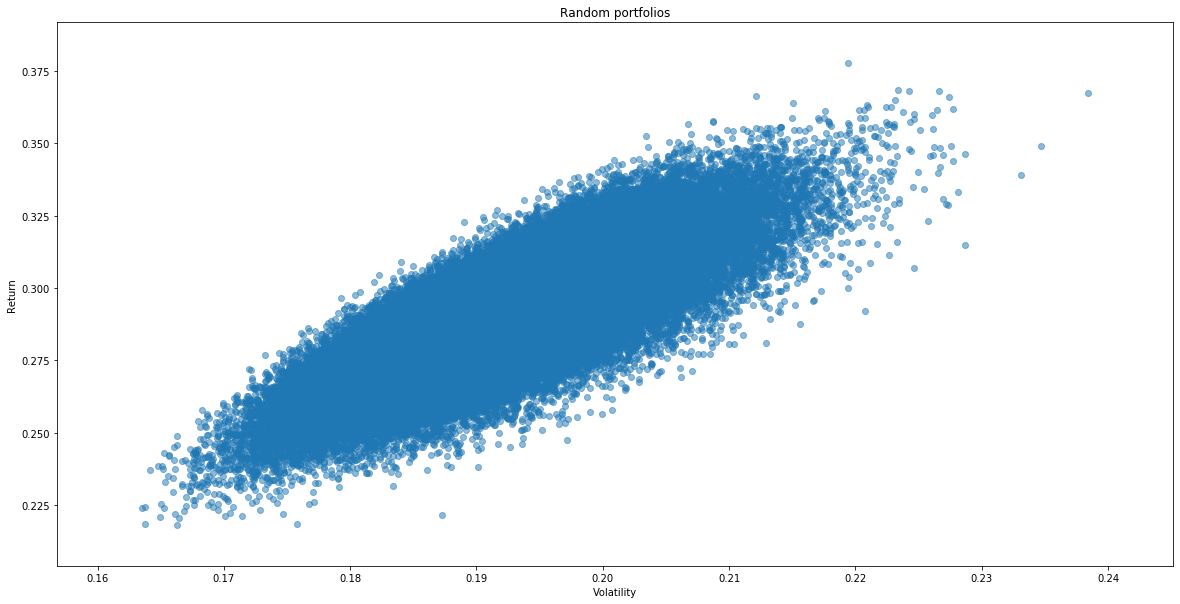

In [13]:
def random_population(n_assets, population_size):
    weights = np.random.uniform(0, 1, size=(population_size, n_assets))

    return weights / weights.sum(axis=-1).reshape((-1, 1))

def annualized_portfolio_return(returns, weights):
    weighted_returns = np.matmul(weights, np.mean(returns.values, 0))

    return (weighted_returns + 1) ** YEAR_BARS - 1


def annualized_portfolio_volatility(returns, weights):
    variance = np.sum(weights * np.matmul(weights, np.cov(returns.T.values)), -1)

    return np.sqrt(variance) * np.sqrt(YEAR_BARS)
    

def annualized_portfolio_performance(returns, weights):
    return np.stack([
        annualized_portfolio_return(returns, weights),
        annualized_portfolio_volatility(returns, weights)
    ], -1)

rand_weights = random_population(train.shape[1], 100000)
rand_solutions = annualized_portfolio_performance(train, rand_weights)

plt.figure(figsize=(20,10))
plt.title('Random portfolios')
plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [14]:
optimizer = Optimizer(mutation_sigma=1.0, verbose=False, max_iter=250, population_size=5000)
solutions, stats = optimizer.run(train.values)

In [15]:
solutions.shape

(838, 20)

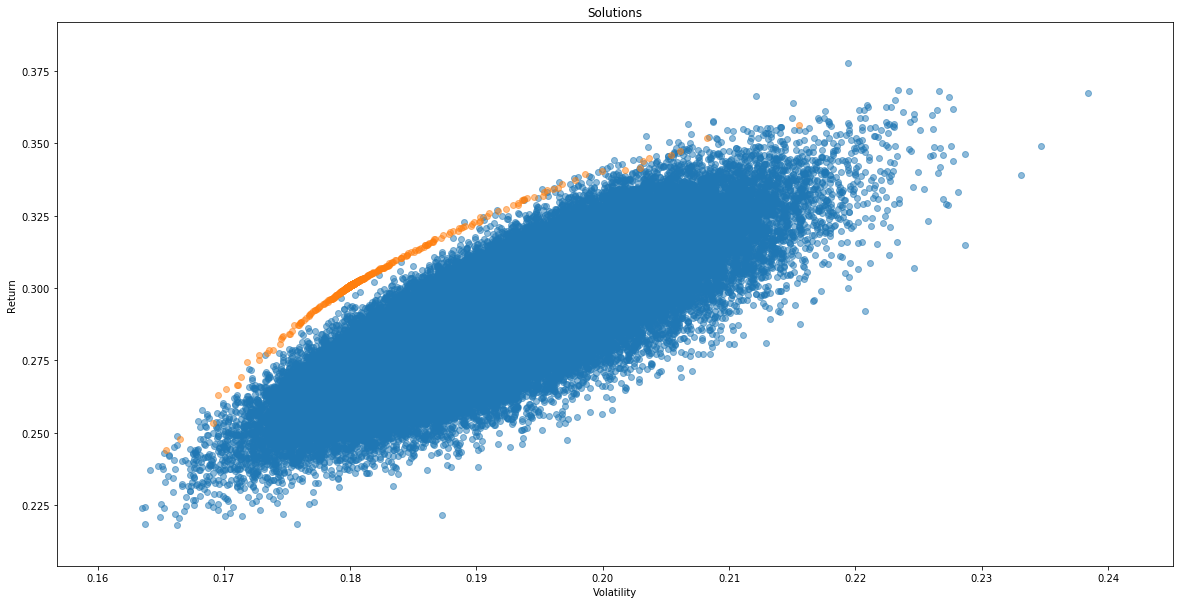

In [16]:
def plot_solutions(data, solutions, rand_solutions):
    ov = annualized_portfolio_performance(data, solutions)
    plt.figure(figsize=(20,10))
    plt.title('Solutions')
    plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
    plt.scatter(ov[:,1], ov[:,0], alpha=.5)
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.show()
    
plot_solutions(train, solutions, rand_solutions)

In [17]:
ov = annualized_portfolio_performance(train, solutions)
sharpe = ov[:,0] / ov[:,1]
solution = solutions[np.argmax(ov[:,0] / ov[:,1])]
# solution = solutions[np.argmin(np.abs(ov[:,1] - 0.16))]
annualized_portfolio_performance(train, solution)

array([0.33959787, 0.19857577])

In [18]:
CAPITAL = 38000

def print_allocation(data, allocations, prices):
    for ticker_id in np.argsort(-allocations):
        print('%s - %.4f, $%.2f USD, %.2f shares' % (data.columns[ticker_id], allocations[ticker_id] * 100, CAPITAL * allocations[ticker_id], (CAPITAL * allocations[ticker_id]) / prices[data.columns[ticker_id]]))
        
print_allocation(train, solution, data['Close'].iloc[-1])

SHOP - 9.7013, $3686.49 USD, 9.40 shares
NFLX - 8.9687, $3408.09 USD, 10.25 shares
TSLA - 7.2888, $2769.73 USD, 4.84 shares
NVDA - 7.1786, $2727.86 USD, 11.83 shares
AAPL - 7.1510, $2717.36 USD, 10.46 shares
AMZN - 6.9165, $2628.26 USD, 1.51 shares
MSFT - 6.8931, $2619.37 USD, 17.98 shares
NKE - 6.2702, $2382.69 USD, 31.36 shares
PYPL - 6.1845, $2350.10 USD, 23.74 shares
MA - 5.6386, $2142.66 USD, 8.70 shares
FB - 5.2742, $2004.18 USD, 12.30 shares
V - 5.2370, $1990.07 USD, 12.29 shares
CRM - 3.5535, $1350.33 USD, 9.30 shares
TXN - 3.4084, $1295.17 USD, 12.90 shares
DIS - 2.7737, $1053.99 USD, 10.96 shares
GOOG - 2.5642, $974.38 USD, 0.85 shares
ADBE - 1.9355, $735.47 USD, 2.49 shares
AMD - 1.2881, $489.47 USD, 11.69 shares
INTC - 0.9623, $365.68 USD, 7.60 shares
SPOT - 0.8117, $308.46 USD, 2.42 shares


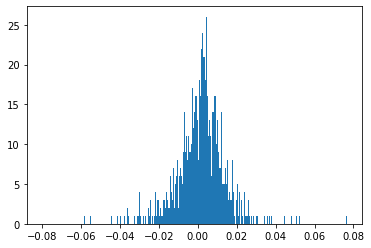

In [19]:
ret = np.dot(train, solution)
plt.hist(ret, bins=1000)
plt.show()

In [20]:
from optfolio.returns_projection import cumulative_n_period_returns, sample_returns, mcmc_sample_returns
from optfolio.report import plot_traces, returns_table

### S&P 500 MC Projection

In [21]:
spy_traces = sample_returns(spy_train, 10 * 252, n_traces=100000)

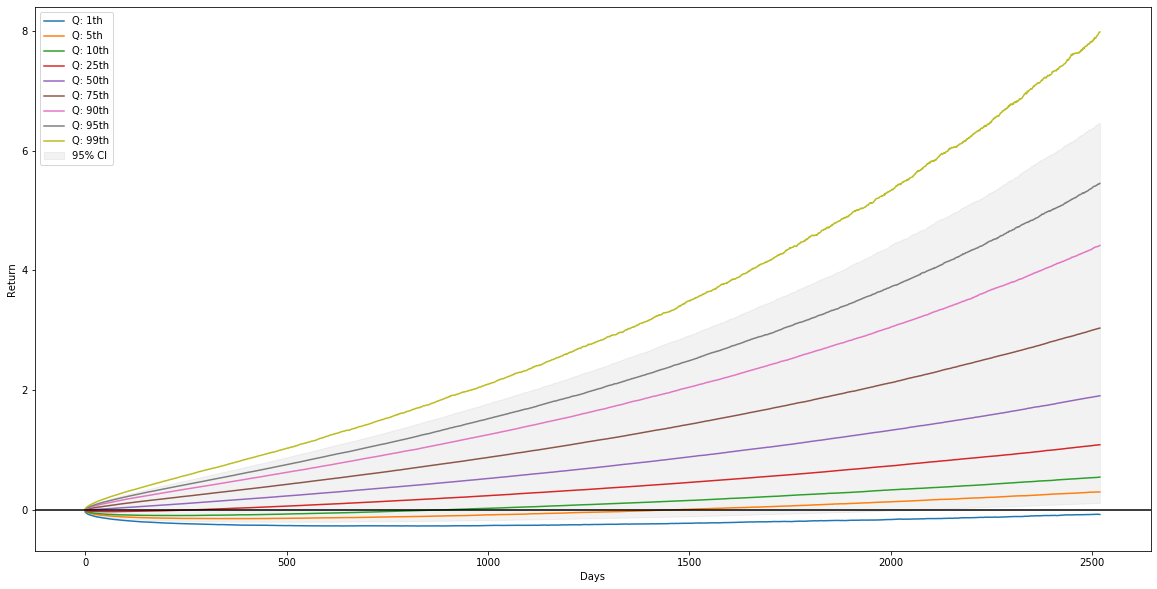

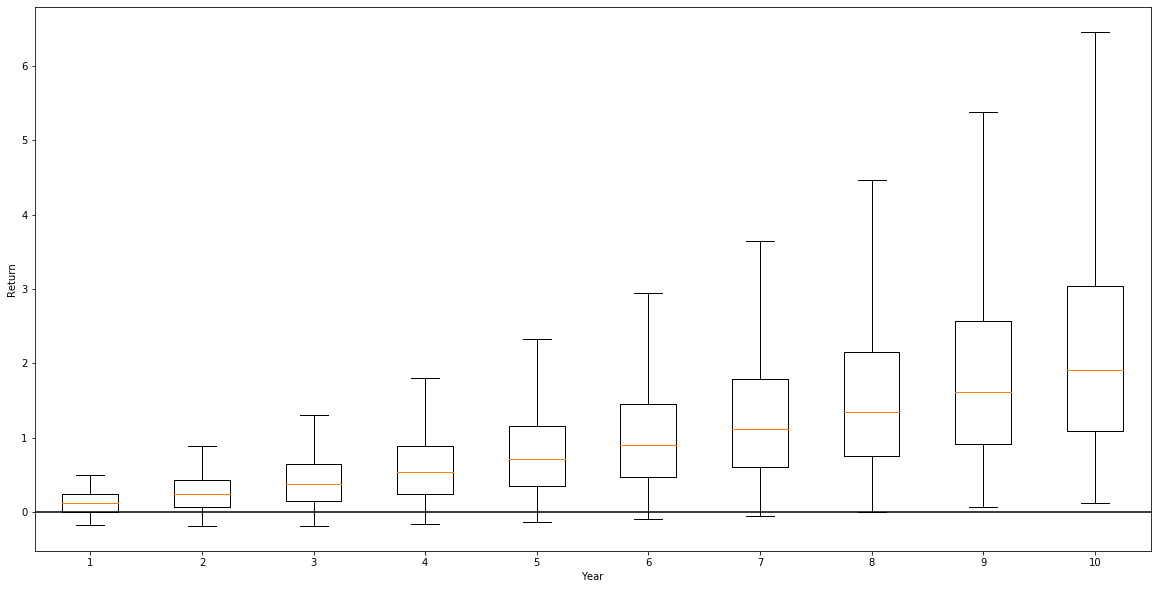

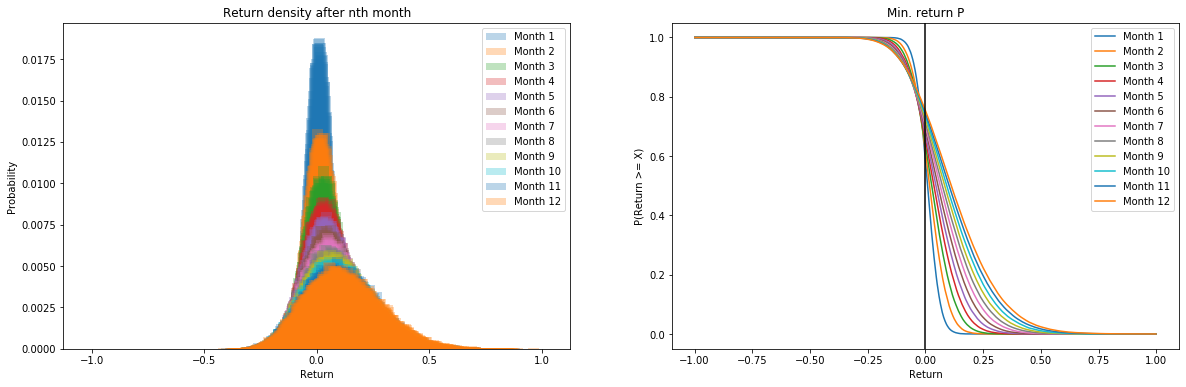

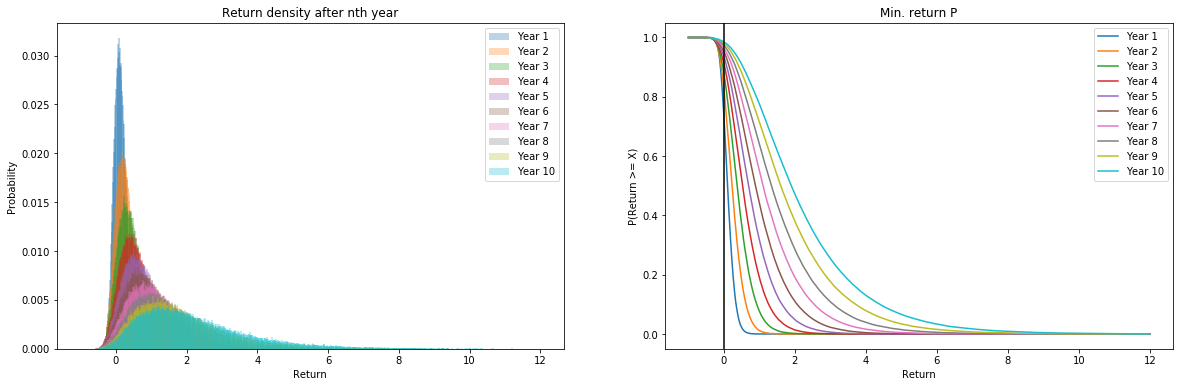

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,24.457,75.543,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,16.238,83.762,1.232,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,11.451,88.549,7.955,0.177,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,8.272,91.728,19.432,1.394,0.082,0.004,0.001,0.000,0.000,0.000,0.000,0.000
5,6.090,93.910,32.203,4.951,0.635,0.081,0.009,0.002,0.000,0.000,0.000,0.000
6,4.553,95.447,44.525,11.159,2.270,0.460,0.091,0.019,0.002,0.000,0.000,0.000
7,3.380,96.620,55.366,19.342,5.722,1.627,0.471,0.144,0.049,0.018,0.005,0.000
8,2.509,97.491,64.433,28.773,10.945,3.941,1.476,0.559,0.211,0.077,0.036,0.013
9,1.861,98.139,71.861,38.249,17.813,7.918,3.431,1.556,0.724,0.348,0.170,0.083


In [22]:
spy_cum_returns = plot_traces(spy_traces)
returns_table(spy_cum_returns)

### MC Projection

In [23]:
traces = sample_returns(ret, 10 * 252, n_traces = 100000)

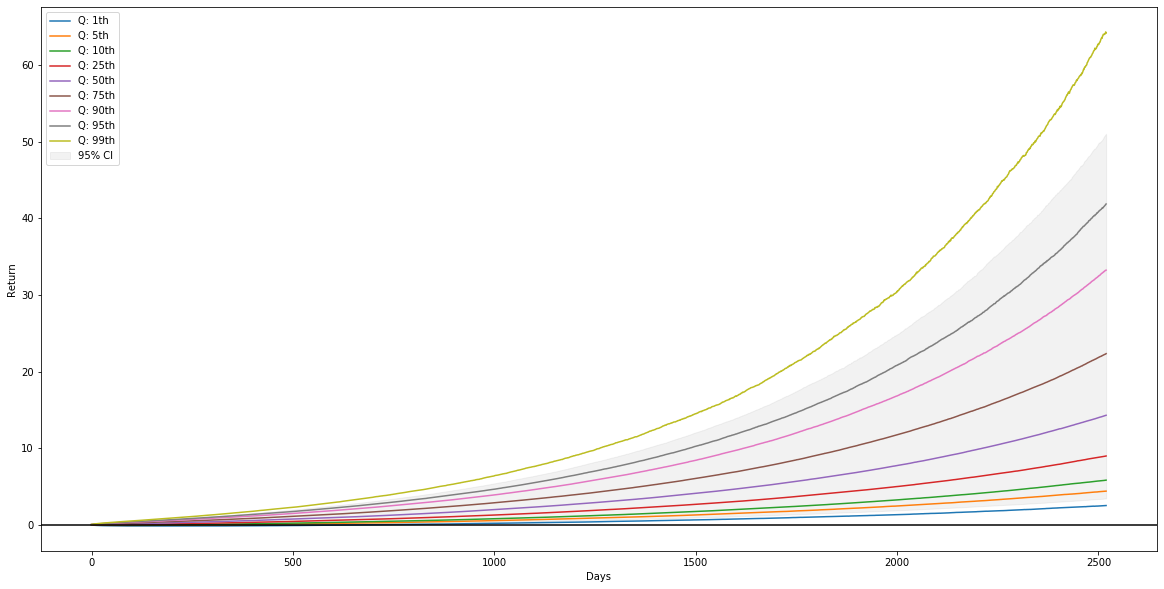

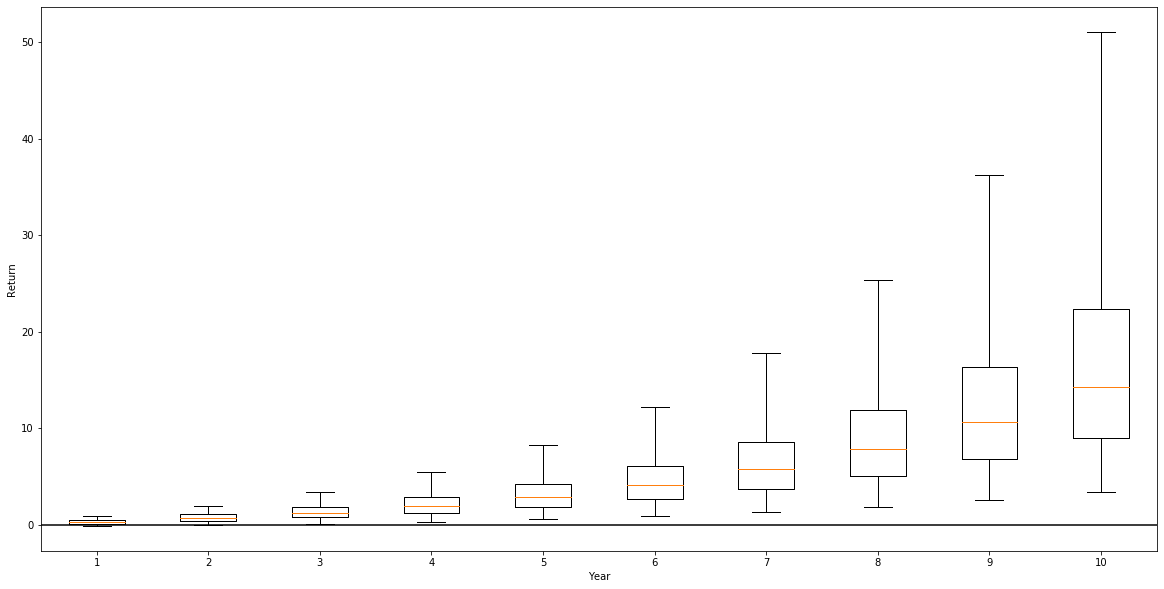

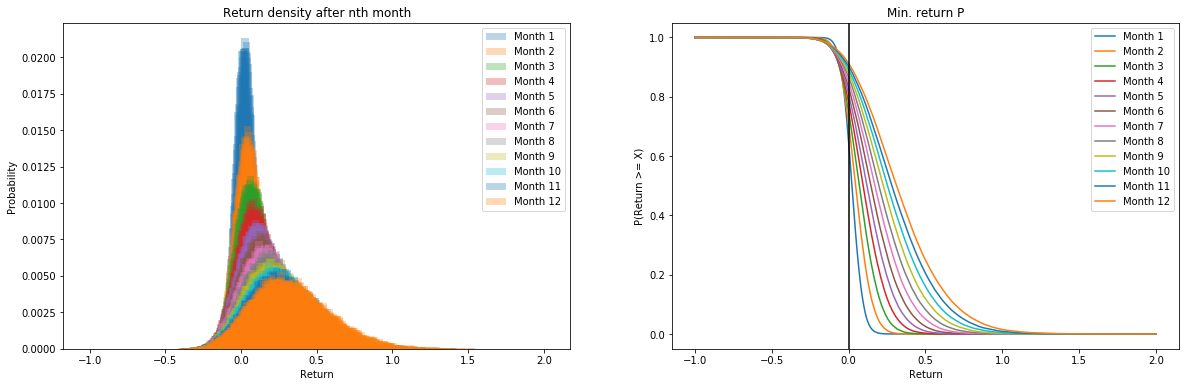

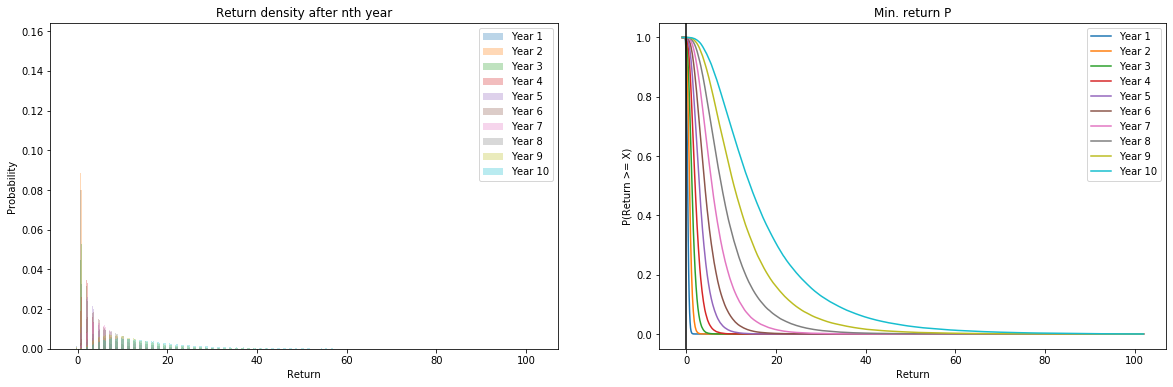

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,8.560,91.440,1.529,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2.748,97.252,30.020,2.334,0.116,0.006,0.000,0.000,0.000,0.000,0.000,0.000
3,0.914,99.086,64.054,20.701,4.850,1.038,0.218,0.058,0.015,0.005,0.003,0.000
4,0.332,99.668,84.024,49.272,22.710,9.380,3.795,1.522,0.619,0.255,0.088,0.041
5,0.111,99.889,93.288,72.468,48.127,28.957,16.630,9.473,5.284,3.001,1.702,0.967
6,0.040,99.960,97.240,86.388,69.527,52.334,37.453,26.189,18.001,12.318,8.432,5.794
7,0.019,99.981,98.882,93.671,83.957,71.500,58.975,47.174,37.323,29.070,22.672,17.596
8,0.008,99.992,99.550,97.166,91.970,84.537,75.579,66.224,57.226,48.881,41.369,35.012
9,0.003,99.997,99.814,98.762,96.195,92.064,86.679,80.321,73.546,66.722,60.219,53.863


In [24]:
cum_returns = plot_traces(traces)
returns_table(cum_returns)

### MCMC Projection

In [170]:
mcmc_traces = mcmc_sample_returns(ret, 5 * 252, n_traces=100000, mc_states = 10, n_jobs=10)

Process ForkPoolWorker-31:
Process ForkPoolWorker-34:
Process ForkPoolWorker-33:
Process ForkPoolWorker-36:
Process ForkPoolWorker-32:
Process ForkPoolWorker-37:
Process ForkPoolWorker-38:
Process ForkPoolWorker-40:
Process ForkPoolWorker-35:
Process ForkPoolWorker-39:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/

In [171]:
mcmc_cum_returns = plot_traces(mcmc_traces)
returns_table(mcmc_cum_returns)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'